In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [53]:
df=pd.read_csv('housepre.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [54]:
df.shape


(13320, 9)

In [55]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [56]:
df.head()
df1=df.drop(['availability','society','balcony','area_type'],axis='columns')
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [57]:
df1.shape

(13320, 5)

In [58]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [59]:
df2=df1.dropna()

In [60]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [63]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\Muhammad Suleman\AppData\Local\Temp\ipykernel_8576\2258653898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [64]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

df2[df2.bhk>20]
df2

In [66]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [67]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [68]:
df2[~df2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [69]:
def convert_num(x):
    token=x.split('-')
    if len(token)==2:
              return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [70]:
convert_num('2100 - 2850')

2475.0

In [71]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_num)


In [72]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [73]:
df4=df3.copy()

In [74]:
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [75]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [76]:
df4.location=df4.location.apply(lambda x: str(x).strip())
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
len(location_stats)

1293

In [77]:
location_less_10=location_stats[location_stats<=10]
location_less_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [78]:
len(df4.location.unique())

1293

In [79]:
df4.location=df4.location.apply(lambda x:"other" if x in location_less_10 else x)
len(df4.location.unique())

242

In [80]:
df4.shape

(13246, 7)

In [81]:
df5=df4[~(df4.total_sqft/df4.bhk<30)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [82]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced],ignore_index=False)
    return df_out

df6=remove_pps_outliers(df5)
df6.shape

(10961, 7)

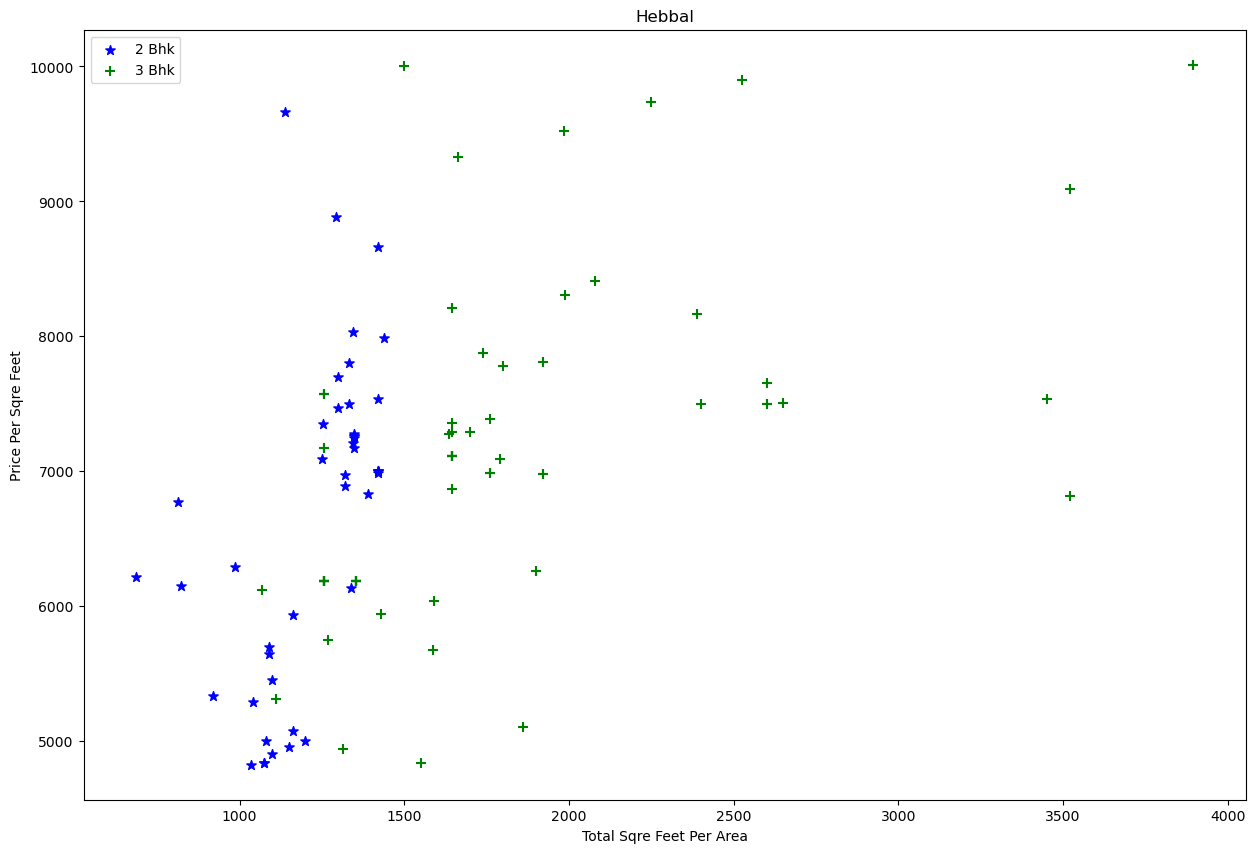

In [83]:
def plt_scatter_chart(df6,location):
    bhk2=df6[(df6.location==location) & (df6.bhk==2)]
    bhk3=df6[(df6.location==location) & (df6.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',marker='*',label='2 Bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color='green',marker='+',label='3 Bhk',s=50)
    plt.xlabel('Total Sqre Feet Per Area')
    plt.ylabel('Price Per Sqre Feet')
    plt.title(location)
    plt.legend()


plt_scatter_chart(df6,'Hebbal')

    

In [84]:
def bhk_remove_outliers(df6):
    exclude_indices = np.array([])
    bhk_stats = {}  # Initialize bhk_stats dictionary
    
    for location, location_df in df6.groupby('location'):
        bhk_stats = {}  # Reset bhk_stats for each location
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)  # Check for bhk-1 stats
            if stats and stats['count'] > 5:  # Corrected 'counts' to 'count'
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values
                )

    return df6.drop(exclude_indices, axis='index')

df7= bhk_remove_outliers(df6)
df7.shape

(7844, 7)

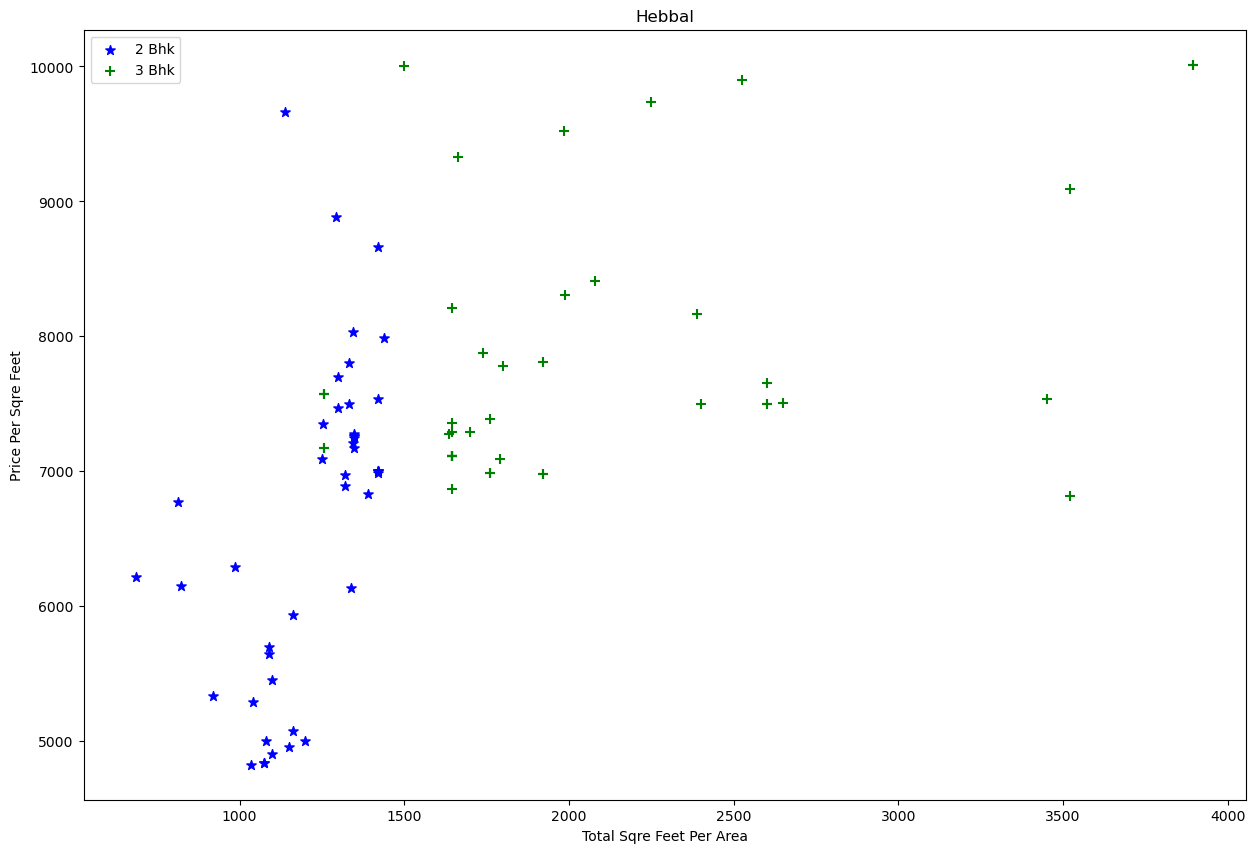

In [85]:
plt_scatter_chart(df7,'Hebbal')

Text(0, 0.5, 'Count')

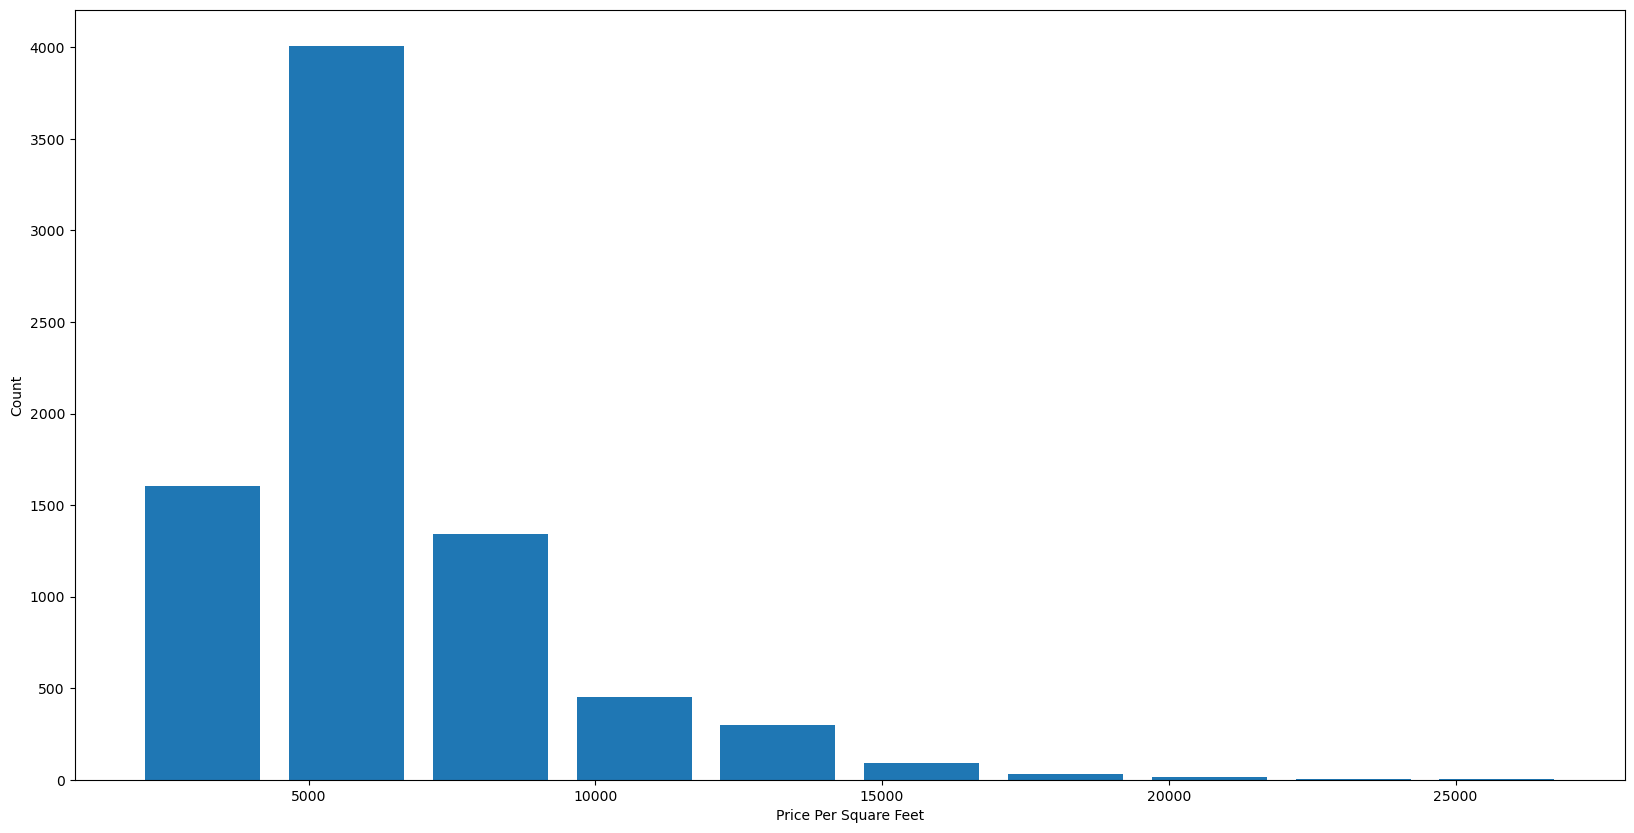

In [86]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [87]:
df.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [88]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
1718,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
1768,other,11 Bedroom,1200.0,11.0,170.0,11,14166.666667
1979,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
4916,other,14 BHK,1250.0,15.0,125.0,14,10000.000000
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [89]:
df7[df7.bath>df7.bhk+2]
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
1162,1st Block Jayanagar,6 BHK,1200.0,6.0,125.0,6,10416.666667
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
5115,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.0,7,9139.784946
...,...,...,...,...,...,...,...
13245,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13285,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [90]:
df8=df7[df7.bath<df7.bhk+2]
df8.shape

(7758, 7)

In [91]:
df9=df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,428.0,4
848,1st Block Jayanagar,1630.0,3.0,194.0,3
1162,1st Block Jayanagar,1200.0,6.0,125.0,6


In [92]:
dummies=pd.get_dummies(df9.location)

In [93]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
210,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1162,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5115,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13245,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13279,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13291,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [94]:
df10=pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1162,1st Block Jayanagar,1200.0,6.0,125.0,6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5115,1st Block Jayanagar,930.0,4.0,85.0,7,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13245,other,1800.0,1.0,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13279,other,1200.0,5.0,130.0,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13285,other,1353.0,2.0,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13291,other,812.0,1.0,26.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
df11=df10.drop('location',axis='columns')
df11

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1162,1200.0,6.0,125.0,6,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5115,930.0,4.0,85.0,7,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13245,1800.0,1.0,200.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13279,1200.0,5.0,130.0,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13285,1353.0,2.0,110.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13291,812.0,1.0,26.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
X=df11.drop('price',axis='columns')

In [97]:
y=df11.price

In [98]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)


In [99]:
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)

LinearRegression()

In [100]:
lr_reg.score(X_test,y_test)

0.7817624557330726

In [102]:
from sklearn.model_selection import cross_val_score , ShuffleSplit
cv=ShuffleSplit(n_splits=5,random_state=0,test_size=0.2)
cvs=cross_val_score(LinearRegression(),X,y,cv=cv)
cvs

array([0.8378817 , 0.79258786, 0.84872169, 0.803565  , 0.80074177])

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

In [105]:
def find_out_best_model_using_gridsearchcv(X, y):
    # Handle missing values
    X = X.fillna(X.mean())

    # Scale the dataset
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    score = []
    cv = ShuffleSplit(n_splits=5, random_state=0, test_size=0.2)

    for algos_name, conflict in algos.items():
        gs = GridSearchCV(conflict['model'], conflict['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        score.append({
            'model': algos_name,
            'best_score': gs.best_score_,
            'params': gs.best_params_
        })

    return pd.DataFrame(score, columns=['model', 'best_score', 'params'])

    

    

In [106]:
 find_out_best_model_using_gridsearchcv(X,y)

,model,best_score,params
0,linear_regression,0.816700,{'fit_intercept': True}
1,Lasso,0.815889,"{'alpha': 0.1, 'selection': 'random'}"
2,Tree,0.734133,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [107]:
def pred_score(location,bath,bhk,sqft):
    loc_index=np.where(X.columns==location)[0][0]

    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >0:
        x[loc_index]=1

    return lr_reg.predict([x])[0]    

In [108]:
pred_score("1st Phase JP Nagar",1000,2,2)

C:\Users\Muhammad Suleman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2623.4101860064166

In [109]:
import pickle

with open ('House Prediction Model','wb') as f:
    pickle.dump(lr_reg,f)

In [ ]:
import json

columns={
    'data_columns':[col.lower() for col in X.columns]
}

with open ('columns.json','w') as f:
    f.write(json.dumps(columns))